In [2]:
# import semua lib yang diperlukan
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.model_selection import train_test_split
#import requests
#import json
#from types import SimpleNamespace
# from pandas.io.json import json_normalize

In [57]:
# read file csv
df = pd.read_csv('dataset/telur ayam broiler.csv')
# ambil data dari API Priangan
#r = requests.get('http://dev.priangan.org/api/api/graphic_data/2/1/day/price/2012-01-01/2021-2-15/0/city/-/eceran/null')
#df = r.json()
df

,status,message,data__total,data__result__value,data__result__time,data__result__date,data__result__span,data__average,data__location_id,data__commodity_id,data__legend,data__commodity_name,stat__|,stat__|__total,stat__|__nb_data,stat__|__avg
0,ok,NaN,41611299.0,12888,"January 3, 2009",2009-01-03,3,18651.0,1.0,5.0,Harga Kota Bandung,Telur Ayam Broiler,"January 3, 2009",12888,1,12888
1,NaN,NaN,NaN,12888,"January 4, 2009",2009-01-04,4,NaN,NaN,NaN,NaN,NaN,"January 4, 2009",12888,1,12888
2,NaN,NaN,NaN,12888,"January 5, 2009",2009-01-05,5,NaN,NaN,NaN,NaN,NaN,"January 5, 2009",12888,1,12888
3,NaN,NaN,NaN,12888,"January 6, 2009",2009-01-06,6,NaN,NaN,NaN,NaN,NaN,"January 6, 2009",12888,1,12888
4,NaN,NaN,NaN,12888,"January 7, 2009",2009-01-07,7,NaN,NaN,NaN,NaN,NaN,"January 7, 2009",12888,1,12888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,NaN,NaN,NaN,26000,"March 2, 2020",2020-03-02,62,NaN,NaN,NaN,NaN,NaN,"March 2, 2020",26000,1,26000
2227,NaN,NaN,NaN,26000,"March 3, 2020",2020-03-03,63,NaN,NaN,NaN,NaN,NaN,"March 3, 2020",26000,1,26000
2228,NaN,NaN,NaN,30200,"March 4, 2020",2020-03-04,64,NaN,NaN,NaN,NaN,NaN,"March 4, 2020",30200,1,30200
2229,NaN,NaN,NaN,26000,"March 5, 2020",2020-03-05,65,NaN,NaN,NaN,NaN,NaN,"March 5, 2020",26000,1,26000


In [58]:
#(hapus data yang tidak terpakai)
df.drop(['status','message','data__total','data__result__time','data__result__span','data__average','data__location_id','data__commodity_id','data__legend','data__commodity_name','stat__|','stat__|__total','stat__|__nb_data','stat__|__avg'], axis=1, inplace=True)
df

,data__result__value,data__result__date
0,12888,2009-01-03
1,12888,2009-01-04
2,12888,2009-01-05
3,12888,2009-01-06
4,12888,2009-01-07
...,...,...
2226,26000,2020-03-02
2227,26000,2020-03-03
2228,30200,2020-03-04
2229,26000,2020-03-05


In [59]:
# ubah nama kolom jadi Y dan DS
df.columns=['y','ds']
df

,y,ds
0,12888,2009-01-03
1,12888,2009-01-04
2,12888,2009-01-05
3,12888,2009-01-06
4,12888,2009-01-07
...,...,...
2226,26000,2020-03-02
2227,26000,2020-03-03
2228,30200,2020-03-04
2229,26000,2020-03-05


In [60]:
#ubah index jadi tanggal dengan format datetime
df.index = pd.to_datetime(df.ds)
df.ds = pd.to_datetime(df.ds)
#df = df.drop('ds', axis=1)
#df = df.sort_index()
df

,y,ds
ds,,
2009-01-03,12888,2009-01-03
2009-01-04,12888,2009-01-04
2009-01-05,12888,2009-01-05
2009-01-06,12888,2009-01-06
2009-01-07,12888,2009-01-07
...,...,...
2020-03-02,26000,2020-03-02
2020-03-03,26000,2020-03-03
2020-03-04,30200,2020-03-04


In [61]:
# Split data training dan testing 70:30
# split_date = "2019-01-01"
# df_train = df.loc[df.ds <= split_date].copy() 
# df_test = df.loc[df.ds > split_date].copy()
# df_train.tail()
df_train = df[:int(df.shape[0]*0.8)]
df_test = df[int(df.shape[0]*0.8):]
print(df.shape, df_train.shape, df_test.shape)

(2231, 2) (1784, 2) (447, 2)


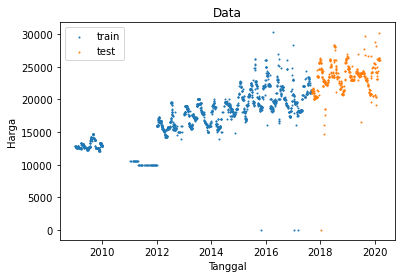

In [62]:
plt.scatter(df_train.ds, df_train.y, s=1, label='train')
plt.scatter(df_test.ds, df_test.y, s=1, label='test')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title("Data")
plt.legend()

In [1295]:
# resampling = fill tanggal yang ke skip
df_train = df_train.resample('D').pad()
#df_train['y'] = df_train.interpolate()
df_train['ds'] = df_train.index
#df.y.fillna(method='ffill', inplace=True)
df_train

,y,ds
ds,,
2009-01-03,12888,2009-01-03
2009-01-04,12888,2009-01-04
2009-01-05,12888,2009-01-05
2009-01-06,12888,2009-01-06
2009-01-07,12888,2009-01-07
...,...,...
2017-09-04,21400,2017-09-04
2017-09-05,21400,2017-09-05
2017-09-06,21500,2017-09-06


In [1296]:
df_train.index = pd.to_datetime(df_train.index)
df_test.index = pd.to_datetime(df_test.index)
print(df_train.index, df_test.index)

DatetimeIndex(['2009-01-03', '2009-01-04', '2009-01-05', '2009-01-06',
               '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-10',
               '2009-01-11', '2009-01-12',
               ...
               '2017-08-30', '2017-08-31', '2017-09-01', '2017-09-02',
               '2017-09-03', '2017-09-04', '2017-09-05', '2017-09-06',
               '2017-09-07', '2017-09-08'],
              dtype='datetime64[ns]', name='ds', length=3171, freq='D') DatetimeIndex(['2017-09-11', '2017-09-12', '2017-09-13', '2017-09-14',
               '2017-09-15', '2017-09-18', '2017-09-19', '2017-09-20',
               '2017-09-22', '2017-09-25',
               ...
               '2020-02-19', '2020-02-20', '2020-02-23', '2020-02-24',
               '2020-02-27', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-08'],
              dtype='datetime64[ns]', name='ds', length=447, freq=None)


In [1297]:
# drop nilai 0 kalo pake MAPE
df_test = df_test[(df_test != 0).all(1)]

In [1298]:
# kalo mau export data ke csv
#df.to_csv("cleaned.csv", index=False, header=False)

In [1299]:
# Split data training dan testing 70:30
# split_date = "2019-01-01"
# df_train = df.loc[df.ds <= split_date].copy() 
# df_test = df.loc[df.ds > split_date].copy()
# df_train.tail()
# df_train = df[:int(df.shape[0]*0.7)]
# df_test = df[int(df.shape[0]*0.7):]
# print(df.shape, df_train.shape, df_test.shape)

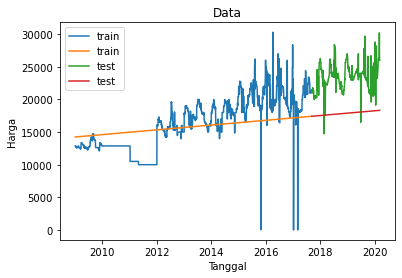

<Figure size 28800x7200 with 0 Axes>

In [1300]:
plt.plot(df_train, label='train')
plt.plot(df_test, label='test')
#plt.plot(x, x**3, label='cubic')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.title("Data")
plt.legend()
f = plt.figure()
f.set_figwidth(400)
f.set_figheight(100)

In [1301]:
# fitting model
m = Prophet()
m.add_country_holidays(country_name = 'ID')
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\azra\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


In [1302]:
# bikin prediksi dari model yang udah dibuat
forecast = m.predict(df_test)
# forecast = m.make_future_dataframe(periods = 90)
forecast.tail()

C:\Users\azra\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)
C:\Users\azra\anaconda3\lib\site-packages\prophet\hdays.py:105: Warning: We only support Nyepi holiday from 2009 to 2019
  warnings.warn(warning_msg, Warning)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ascension of Jesus,Ascension of Jesus_lower,Ascension of Jesus_upper,Ascension of the Prophet,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
441,2020-03-02,18139.910237,8457.285308,27586.558495,9497.724304,27436.684756,0.0,0.0,0.0,0.0,...,3.725613,3.725613,3.725613,-265.122190,-265.122190,-265.122190,0.0,0.0,0.0,17878.513659
442,2020-03-03,18138.060016,9060.922216,27072.630994,9477.790733,27458.913767,0.0,0.0,0.0,0.0,...,38.907189,38.907189,38.907189,-336.409730,-336.409730,-336.409730,0.0,0.0,0.0,17840.557476
443,2020-03-04,18136.209796,8796.172679,27088.283094,9450.124774,27481.142778,0.0,0.0,0.0,0.0,...,1.359579,1.359579,1.359579,-404.352885,-404.352885,-404.352885,0.0,0.0,0.0,17733.216491
444,2020-03-05,18134.359575,9230.893218,26545.520568,9422.458815,27503.371789,0.0,0.0,0.0,0.0,...,31.786656,31.786656,31.786656,-468.565032,-468.565032,-468.565032,0.0,0.0,0.0,17697.581200
445,2020-03-08,18128.808913,8369.784668,26975.731713,9338.560346,27570.058823,0.0,0.0,0.0,0.0,...,-96.789745,-96.789745,-96.789745,-635.956866,-635.956866,-635.956866,0.0,0.0,0.0,17396.062303


In [1303]:
#m.plot(forecast)

In [1304]:
#m.plot_components(forecast)

In [1305]:
#itung MSE
mse = mean_squared_error(y_true = df_test["y"], y_pred = forecast['yhat'])
mse

22878476.22294761

In [1306]:
#itung MAE
mae = mean_absolute_error(y_true = df_test["y"], y_pred = forecast['yhat'])
mae


4428.142732975051

In [1307]:
#itung MAPE
def mean_abs_perc_err(y_true, y_pred) :
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_abs_perc_err(y_true = np.asarray(df_test['y']), y_pred = np.asarray(forecast['yhat']))
mape

18.5244245549057

In [1308]:
#itung akurasi
akurasi = 100 - mape
akurasi

81.47557544509431

In [1309]:
np.where(df_test['y'] == 0)

(array([], dtype=int64),)